In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
def rearrange_cols(cols, methods):
    cols2 = []
    for m in methods:
        for c in cols:
            if m in c:
                cols2.append(c)
                break
    
#     assert(len(cols2) == len(cols))
    return cols2

def get_stats(cols, manifest):
    mean_vals = []
    std_vals = []
    
    for c in cols:
        mean_vals.append(np.mean(manifest[c]))
        std_vals.append(np.std(manifest[c]))
    
    return mean_vals, std_vals

def get_pvalue(col_ref, cols, manifest):
    pvals = []
    
    ref = np.array(manifest[col_ref])
    
    for c in cols:
        pvals.append(scipy.stats.ttest_rel(ref, np.array(manifest[c])).pvalue)
    
    return pvals

In [3]:
manifest = pd.read_csv('mayo2d_ssim_rmse_avg.csv')
dpi = 200
methods = ['FBP', 'L2 (universal)', 'Average', 'Ensemble', 'L2 (matched)']
display_name = ['FBP', 'L2\n(all)', 'Average', 'Ensemble', 'L2\n(4x)']

[2.0199921961332858e-151, nan, 1.4032427196037854e-110, 2.4092987839298337e-25, 3.5271215304607796e-102]


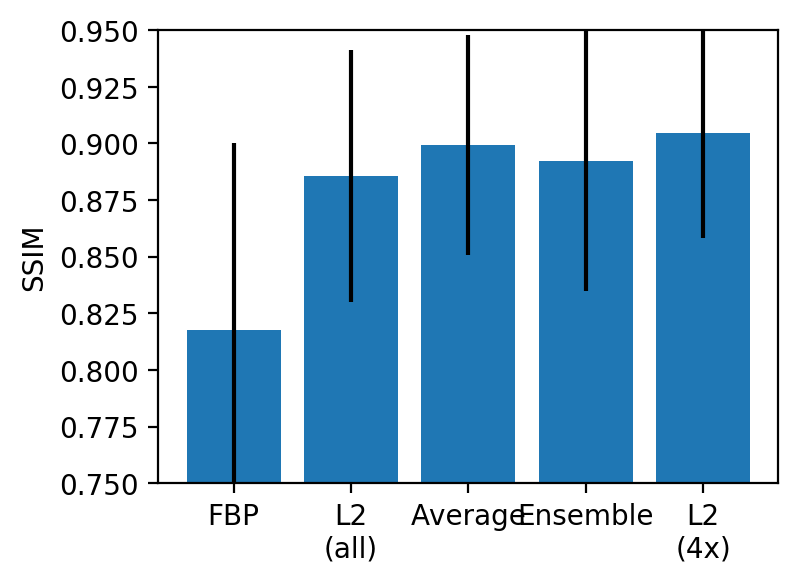

In [4]:
# plot the for mayo quarter dose
cols = [c for c in manifest if 'Mayo' in c and 'SSIM' in c]
cols = rearrange_cols(cols, methods)
mean_vals, std_vals = get_stats(cols, manifest)
pvals = get_pvalue(cols[1], cols, manifest)

plt.figure(figsize=[4,3], dpi=dpi)
plt.bar(range(len(cols)), mean_vals, yerr = std_vals)
plt.ylim([0.75, 0.95])
plt.xticks(range(len(cols)), display_name)
plt.ylabel('SSIM')
print (pvals)

([<matplotlib.axis.XTick at 0x7f2aaff7b510>,
 <a list of 5 Text xticklabel objects>)

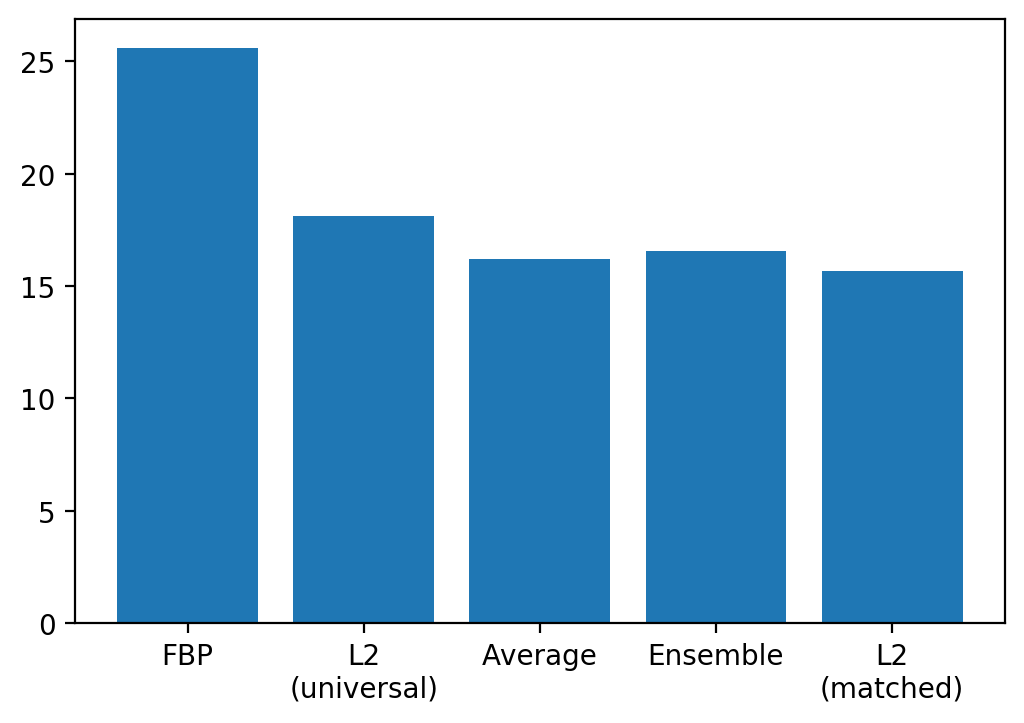

In [5]:
cols = [c for c in manifest if 'Mayo' in c and 'RMSE' in c]
cols = rearrange_cols(cols, methods)
mean_vals, std_vals = get_stats(cols, manifest)

plt.figure(figsize=[6,4], dpi=dpi)
plt.bar(range(len(cols)), mean_vals)
# plt.ylim([0.8, 0.91])
plt.xticks(range(len(cols)), [c.split('/')[1].replace(' ', '\n') for c in cols])

Text(0.5, 0, 'Dose Reduction Rate')

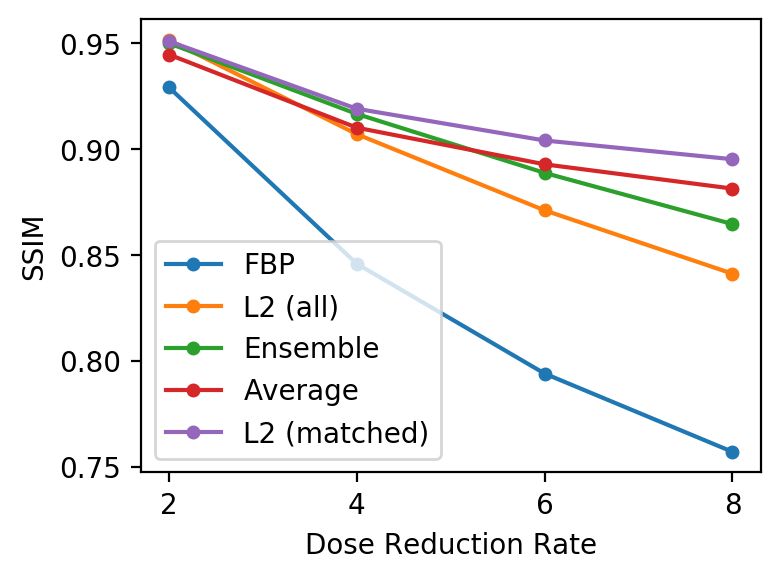

In [6]:
# plot the for all dose levels
cols = [c for c in manifest if 'Mayo' not in c and 'SSIM' in c]
dose_levels = [2,4,6,8]
mean_plots = {m: [] for m in methods}
std_plots = {m: [] for m in methods}
for dose in dose_levels:
    dose_cols = [c for c in cols if '%dx'%dose in c]
    dose_cols = rearrange_cols(dose_cols, methods)
    
    mean_vals, std_vals = get_stats(dose_cols, manifest)
    
    for i in range(len(dose_cols)):
        mean_plots[methods[i]].append(mean_vals[i])
        std_plots[methods[i]].append(std_vals[i])
        

plt.figure(figsize=[4,3], dpi=dpi)
for name in mean_plots:
    plt.plot(dose_levels, mean_plots[name], 'o-', markersize = 4)
plt.legend(['FBP', 'L2 (all)', 'Ensemble', 'Average', 'L2 (matched)'])
plt.ylabel('SSIM')
plt.xticks([2,4,6,8])
plt.xlabel('Dose Reduction Rate')
# plt.ylim([0.8, 0.91])
# plt.xticks(range(len(cols)), [c.split('/')[1].replace(' ', '\n') for c in cols])

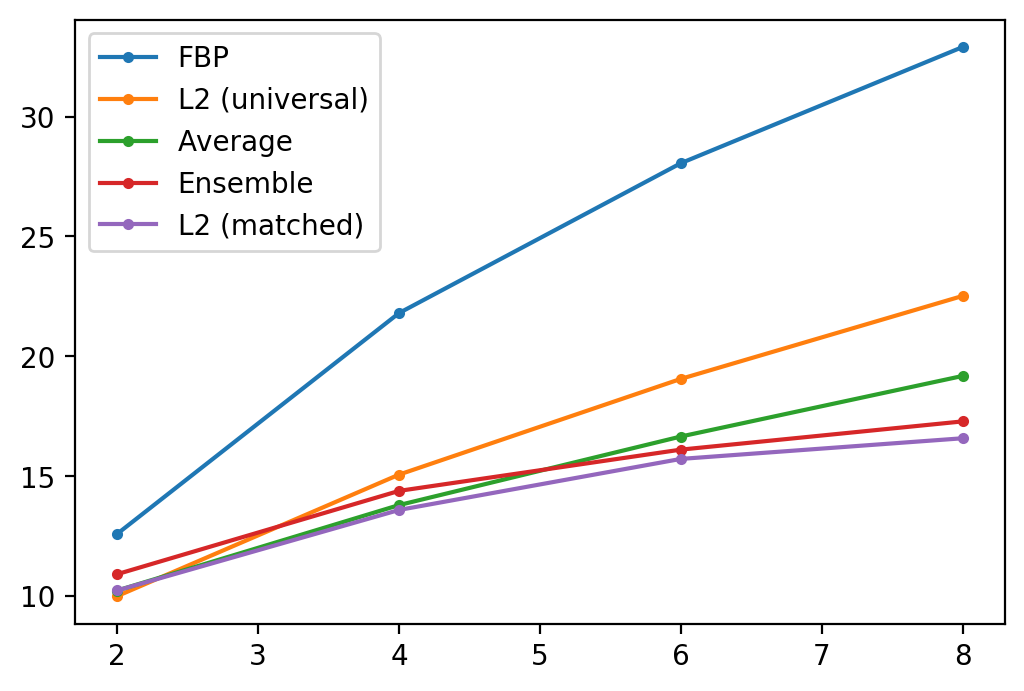

In [7]:
# plot the for all dose levels
cols = [c for c in manifest if 'Mayo' not in c and 'RMSE' in c]
dose_levels = [2,4,6,8]
mean_plots = {m: [] for m in methods}
std_plots = {m: [] for m in methods}
for dose in dose_levels:
    dose_cols = [c for c in cols if '%dx'%dose in c]
    dose_cols = rearrange_cols(dose_cols, methods)
    
    mean_vals, std_vals = get_stats(dose_cols, manifest)
    
    for i in range(len(dose_cols)):
        mean_plots[methods[i]].append(mean_vals[i])
        std_plots[methods[i]].append(std_vals[i])

plt.figure(figsize=[6,4], dpi=dpi)
for name in mean_plots:
    plt.plot(dose_levels, mean_plots[name], '.-')
plt.legend(methods)
# plt.ylim([0.8, 0.91])
# plt.xticks(range(len(cols)), [c.split('/')[1].replace(' ', '\n') for c in cols])

Text(0.5, 0, 'Dose Reduction Rate')

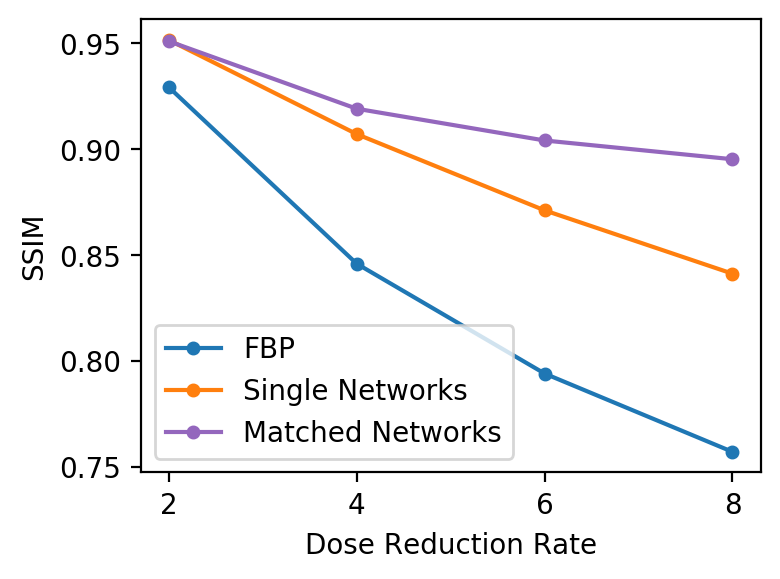

In [8]:
# plot the for all dose levels
cols = [c for c in manifest if 'Mayo' not in c and 'SSIM' in c]
dose_levels = [2,4,6,8]
mean_plots = {m: [] for m in methods}
std_plots = {m: [] for m in methods}
for dose in dose_levels:
    dose_cols = [c for c in cols if '%dx'%dose in c]
    dose_cols = rearrange_cols(dose_cols, methods)
    
    mean_vals, std_vals = get_stats(dose_cols, manifest)
    
    for i in range(len(dose_cols)):
        mean_plots[methods[i]].append(mean_vals[i])
        std_plots[methods[i]].append(std_vals[i])
        
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=[4,3], dpi=dpi)
for i, name in enumerate(mean_plots):
    if i in [0, 1, 4]:
        plt.plot(dose_levels, mean_plots[name], 'o-', markersize = 4, color = colors[i])
plt.legend(['FBP', 'Single Networks', 'Matched Networks'])
plt.ylabel('SSIM')
plt.xticks([2,4,6,8])
plt.xlabel('Dose Reduction Rate')
# plt.ylim([0.8, 0.91])
# plt.xticks(range(len(cols)), [c.split('/')[1].replace(' ', '\n') for c in cols])

In [9]:
mean_plots

{'FBP': [0.9292536951388808,
  0.8458520306852788,
  0.7939401108598287,
  0.75694143066526],
 'L2 (universal)': [0.9515764846639035,
  0.9071040426497552,
  0.8710792963369826,
  0.8411440047336184],
 'Average': [0.9500799343501545,
  0.9166524928917374,
  0.8887864179731985,
  0.864586763997792],
 'Ensemble': [0.944734908084478,
  0.9101585433668107,
  0.892835015626713,
  0.8813554082459644],
 'L2 (matched)': [0.9510143466802157,
  0.9191053795829498,
  0.9041028430129429,
  0.8952386045858303]}